# Do the following in the iris dataset.
# 1. Read the dataset to the python environment.

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [402]:
data=pd.read_excel('iris e.xls')

In [403]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [404]:
#checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [405]:
#checking is there any null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [406]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

# 2. Do necessary pre-processing steps.

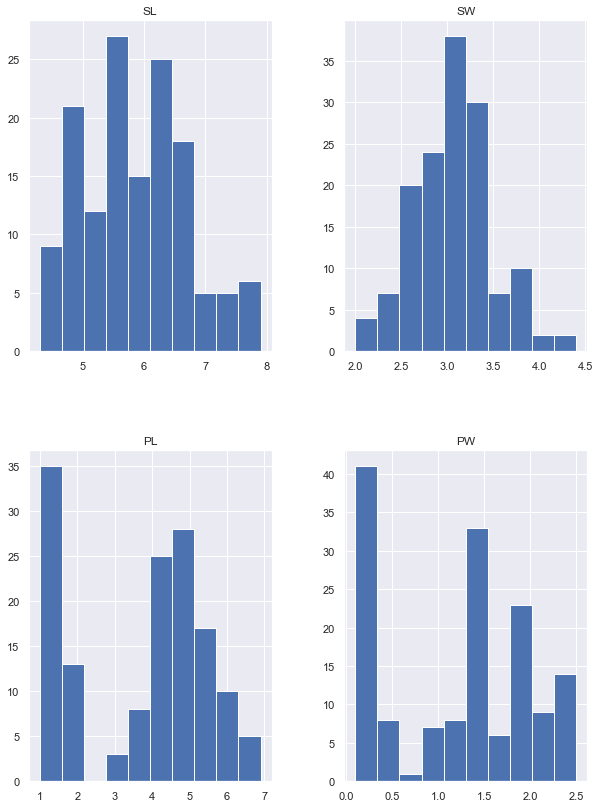

In [407]:
#plotting the entire float values in Histogram
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,14))
plt.show()

In [408]:
#fixing the missing values by using Median function

In [409]:
data['SL']=data['SL'].fillna(data['SL'].median())

In [410]:
data['SW']=data['SW'].fillna(data['SW'].median())

In [411]:
data['PL']=data['PL'].fillna(data['PL'].median())

In [412]:
#Checking the data nulls after filling 
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

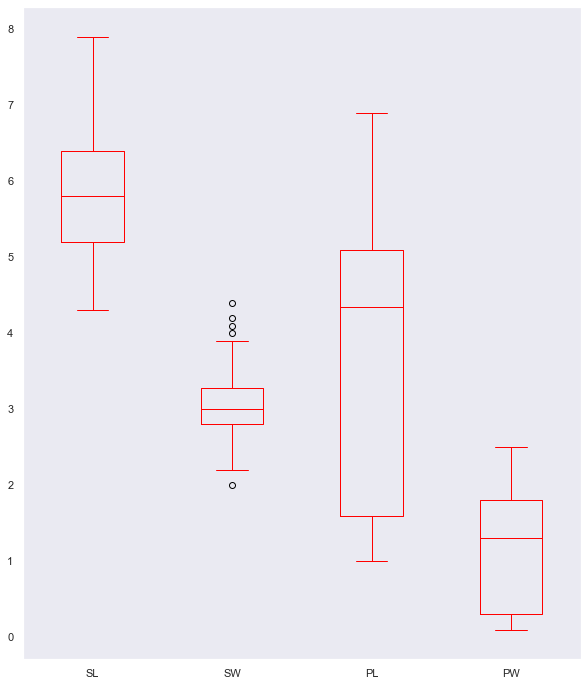

In [413]:
#We've to find out the outliers in the data's
plt.figure(figsize=(10,12))
data.boxplot(column=['SL','SW','PL','PW'],grid=False,color='red')

In [414]:
# From the "SW" Box plot we can say that there are few outliers existing. so we've to fix it
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [415]:
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)

Q1: 2.8
Q2: 3.0
Q3: 3.25


In [416]:
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
Up_lim=Q3+(1.5*IQR)
print('lower limit is',low_lim)
print('Upper limit is',Up_lim)

lower limit is 2.1249999999999996
Upper limit is 3.9250000000000003


In [417]:
outlier=[]
for x in data['SW']:
    if(x>Up_lim)or(x<low_lim):
        outlier.append(x)
    

In [418]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [419]:
ind_val=data[(data['SW']>Up_lim) |(data['SW']<low_lim)]

In [420]:
ind_val.index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [421]:
data.drop([14, 15, 32, 33,60],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2179ed791c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2179eb28550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2179ed79670>],
 'medians': [<matplotlib.lines.Line2D at 0x2179eb28b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2179eb28ca0>],
 'means': []}

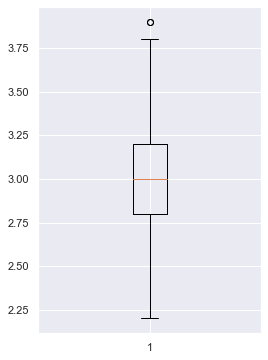

In [422]:
# Boxplot of SW
plt.figure(figsize=(4,6))
plt.boxplot(data['SW'])

<Figure size 576x576 with 0 Axes>

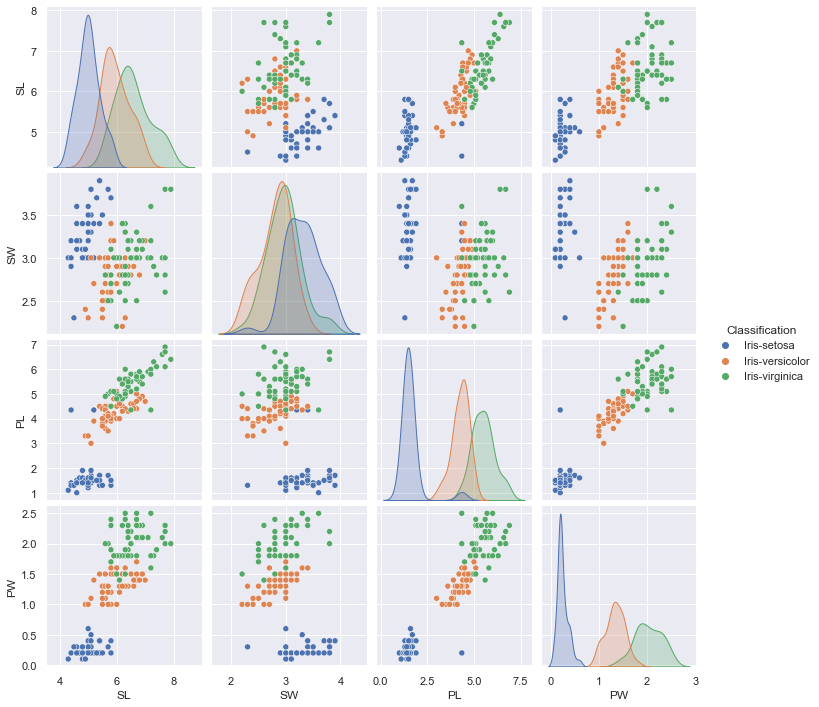

In [423]:
# pairplot of features
plt.figure(figsize=(8,8))
sns.pairplot(data=data,hue='Classification')

plt.show()

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [424]:
# Separating the data into dependent and independent variables
X=data.drop(['Classification'],axis=1)
y=data['Classification']

In [425]:
#Perform Label encoding 
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
y=label_en.fit_transform(y)

In [426]:
#Performing Min Max scaling 
from sklearn import preprocessing  
min_max = preprocessing.MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

In [427]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [428]:
X_train.shape

(116, 4)

# Training the models

1) Logistic Regression

2) K – Nearest Neighbour (KNN)

3) Support Vector Machine (SVM)

4) Decision Trees

5) Random Forest

6) Gradient Boosting

# 1.Logistic Regression

In [429]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [430]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29

[[9 0 0]
 [0 9 0]
 [0 2 9]]
accuracy is 0.9310344827586207


# 2. K – Nearest Neighbour (KNN)

In [431]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

[[9 0 0]
 [0 8 1]
 [0 2 9]]
accuracy is 0.896551724137931


# 3.Support Vector Machine (SVM)

In [432]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
accuracy is 0.9310344827586207


# 4.Decision Trees

In [433]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

[[9 0 0]
 [0 8 1]
 [0 2 9]]
accuracy is 0.896551724137931


# 5. Random Forest

In [434]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9310344827586207


In [435]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
model = gb.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
accuracy is 0.9310344827586207


In [436]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
   LogisticRegression(),
    KNeighborsClassifier(n_neighbors = 8,metric = 'minkowski'),
    SVC(kernel='linear'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

LogisticRegression
****Results****
Accuracy: 93.1034%
KNeighborsClassifier
****Results****
Accuracy: 89.6552%
SVC
****Results****
Accuracy: 89.6552%
DecisionTreeClassifier
****Results****
Accuracy: 89.6552%
RandomForestClassifier
****Results****
Accuracy: 89.6552%
GradientBoostingClassifier
****Results****
Accuracy: 93.1034%


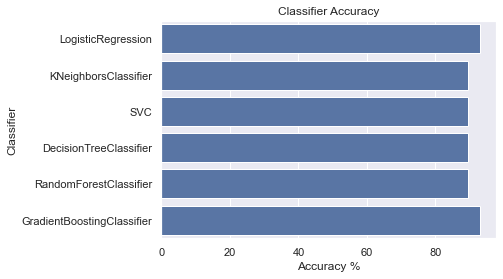

In [437]:
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

Summary:
In this project, we trained our own supervised machine learning model using Iris Flower Classification Project with Machine Learning.

After the implementing the Linear regression, K – Nearest Neighbour (KNN) , Support Vector Machine (SVM),decision tree and Random forest algorithms from all, logistic regression  came out with the best accuracy of prediction  so we can use that model for best predictions